In [19]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import process_library as preprocess
import preprocessing
import cleavage_rate as clv
import sys
sys.path.append('../../code_general')
import read_model_ID as model
reload(model)
reload(clv)
reload(preprocess)
reload(preprocessing)

<module 'preprocessing' from 'preprocessing.py'>

In [ ]:
guideE = 'GACGCATAAAGATGAGACGC'
filenameE = 'WT_cleavage_rate_and_y0.txt'
PathE = '../../data_nucleaseq_Finkelsteinlab/targetE/'
dataE = pd.read_table(PathE+filenameE, usecols=['target', 'cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl'])
dataE.rename(columns={'target':'Sequence'}, inplace=True)
dataE.head()

In [ ]:
guideD = 'GTGATAAGTGGAATGCCATG'
filenameD = 'WT_cleavage_rate_and_y0.txt'
PathD = '../../data_nucleaseq_Finkelsteinlab/targetD/'
dataD = pd.read_table(PathD+filenameD, usecols=['target', 'cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl'])
dataD.rename(columns={'target':'Sequence'}, inplace=True)
dataD.head()

In [ ]:
Cas='Cas9'
on_targetD = 'TTTA' + guideD + 'TGG'
on_targetE = 'TTTA' + guideE + 'TGG'
seq_colname = 'Sequence'
output_colnames = ['cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 2
out_file_name = filenameE.split('.')[0]
out_path = '../data_nucleaseq_Finkelsteinlab/'

print on_targetE
print on_targetD

In [ ]:
reload(preprocess)
new_dataE = preprocess.process_Finkelstein_Library(dataE, on_targetE, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = True, Mut_type = ['OT','r'], Mut_min = 0, Mut_max = 2,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = False)
new_dataE['Target']=preprocess.separate_PAM(on_targetE)[1]
new_dataE.head()

In [ ]:
reload(preprocess)
new_dataD = preprocess.process_Finkelstein_Library(dataD, on_targetD, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = True, Mut_type = ['OT','r'], Mut_min = 0, Mut_max = 2,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = False)

new_dataD['Target']=preprocess.separate_PAM(on_targetD)[1]
new_dataD.head()

In [ ]:
frames = [new_dataD, new_dataE]
combined_data = pd.concat(frames)
combined_data.head()

In [ ]:
combined_data.to_csv('../../data_nucleaseq_Finkelsteinlab/combined_data_DE.csv', index=False)

In [27]:
reload(preprocessing)
xdata,ydata,yerr = preprocessing.prepare_multiprocessing_seq_dep('combined_data_DE.csv','../../data_nucleaseq_Finkelsteinlab/')

In [28]:
a = 1
print xdata[a]
print ydata[a]
print yerr[a]

print len(ydata[a])

['AACAGAGTAGAAATACGCAG', 'CGCAGAGTAGAAATACGCAG', [1, 2]]
[-3.39944803105766]
[0.13770633685145128]
1


In [ ]:
data = pd.read_table('../../fits_Stijn/3_4_2019/fit_3_4_2019_sim_1.txt',index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 42']
parameters2 = final_par.values

parameters = np.zeros(35)
parameters[0:20] = parameters2[0:20]
parameters[-2] = parameters2[-2]
parameters[-1] = parameters2[-1]
parameters[20:33] = 6.*np.ones(13)
parameters[21] = 0. #match AT
parameters[24] = 0. #match AU
parameters[29] = 0. #match GC
parameters[30] = 2. #wobble pair
parameters[25] = 2. #TG
parameters[27] = 3. #TU
parameters[23] = 4.5 #AC
parameters[31] = 7. #CC
parameters[28] = 7. #GG
parameters[22] = 6.5 #AG
modelID = 'Sequence_dependent_clv_v1'

chi = 0.0

for i in range(len(xdata)):
    chi = chi + clv.calc_chi_squared(parameters, xdata[i],ydata[i],yerr[i],20,'Sequence_dependent_clv_v1')
    
print chi
print parameters


In [35]:
reload(clv)
parameters = 6*np.ones(10)
parameters[7] = 2. #wobble pair
parameters[3] = 2. #TG
parameters[5] = 3. #TU
parameters[2] = 4.5 #AC
parameters[8] = 7. #CC
parameters[6] = 7. #GG
parameters[1] = 6.5 #AG

chi = 0.0

for i in range(len(xdata)):
    chi = chi + clv.calc_chi_squared(parameters, xdata[i],ydata[i],yerr[i],20,'Sequence_dependent_clv_v2')
    
print chi

Wrong number of parameters


TypeError: 'NoneType' object is not iterable

In [43]:
filename = 'fit_29_4_2019a_sim_1.txt'
path = '../../fits_Stijn/29_4_2019a/'
data = pd.read_table(path+filename,index_col=False,error_bad_lines=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 14']
parameters = final_par.values
#parameters[6] = float(parameters[6])
chi_trace = data.loc[:,'Potential']
modelID = 'Sequence_dependent_clv_v3'

Text(0.5,1,'Single mismatches per mismatch type, guide E')

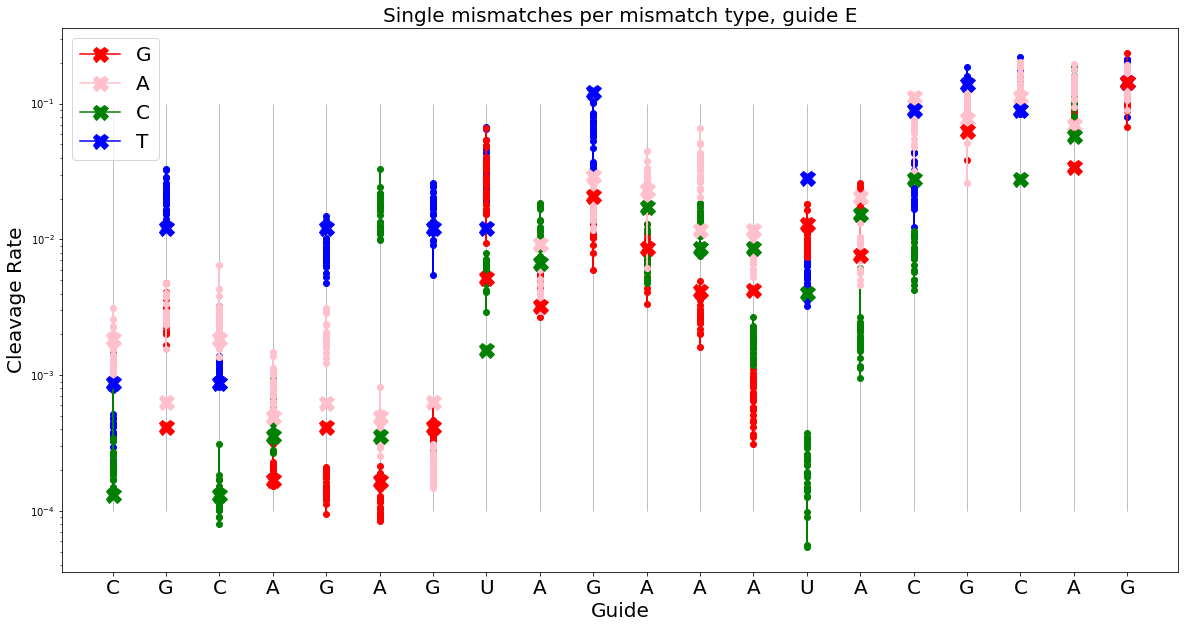

In [44]:
plt.figure(figsize=[20,10])
guideE = 'CGCAGAGTAGAAATACGCAG'

path = '../../data_nucleaseq_Finkelsteinlab/targetE/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
data = pd.read_csv(path+filename)
data.columns = [c.replace(' ', '_') for c in data.columns]

guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'
labelE = []
labelD = []
for i in range(20):
    labelE.append(guide_sequenceE[i])
    labelD.append(guide_sequenceD[i])

for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: preprocess.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
        #if guide_sequenceD[position-1] == 'C':
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plt.semilogy(np.ones(len(A))*position,A,color='blue',marker='o')
    plt.semilogy(np.ones(len(C))*position,C,color='red',marker='o')
    plt.semilogy(np.ones(len(G))*position,G,color='green',marker='o')
    plt.semilogy(np.ones(len(T))*position,T,color='pink',marker='o')
    
for i in range(20):
    if guideE[i]=='A':
        Ttemp = guideE[0:i] + 'T' + guideE[(i+1):20]
        Gtemp = guideE[0:i] + 'G' + guideE[(i+1):20]
        Ctemp = guideE[0:i] + 'C' + guideE[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideE],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideE],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideE],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
        
    elif guideE[i]=='T':
        Atemp = guideE[0:i] + 'A' + guideE[(i+1):20]
        Gtemp = guideE[0:i] + 'G' + guideE[(i+1):20]
        Ctemp = guideE[0:i] + 'C' + guideE[(i+1):20]

        
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideE],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideE],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideE],20)
        
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
    elif guideE[i]=='G':
        Ttemp = guideE[0:i] + 'T' + guideE[(i+1):20]
        Atemp = guideE[0:i] + 'A' + guideE[(i+1):20]
        Ctemp = guideE[0:i] + 'C' + guideE[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideE],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideE],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideE],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plotG = plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red',label='G')
    elif guideE[i]=='C':
        Ttemp = guideE[0:i] + 'T' + guideE[(i+1):20]
        Gtemp = guideE[0:i] + 'G' + guideE[(i+1):20]
        Atemp = guideE[0:i] + 'A' + guideE[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideE],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideE],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideE],20)
        
        plotA = plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink',label='A')
        plotC = plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green',label='C')
        plotT = plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue',label='T')
        
plt.vlines(range(1,21),10**-4,10**-1,color='grey',linewidth=.5);
plt.xticks(range(1,21),labelE,fontsize=20);
plt.legend(handles=[plotG[0],plotA[0],plotC[0],plotT[0]],fontsize=20)
plt.xlabel('Guide',fontsize=20)
plt.ylabel('Cleavage Rate',fontsize=20)
plt.title('Single mismatches per mismatch type, guide E',fontsize=20)

Text(0.5,1,'Single mismatches per mismatch type, guide D')

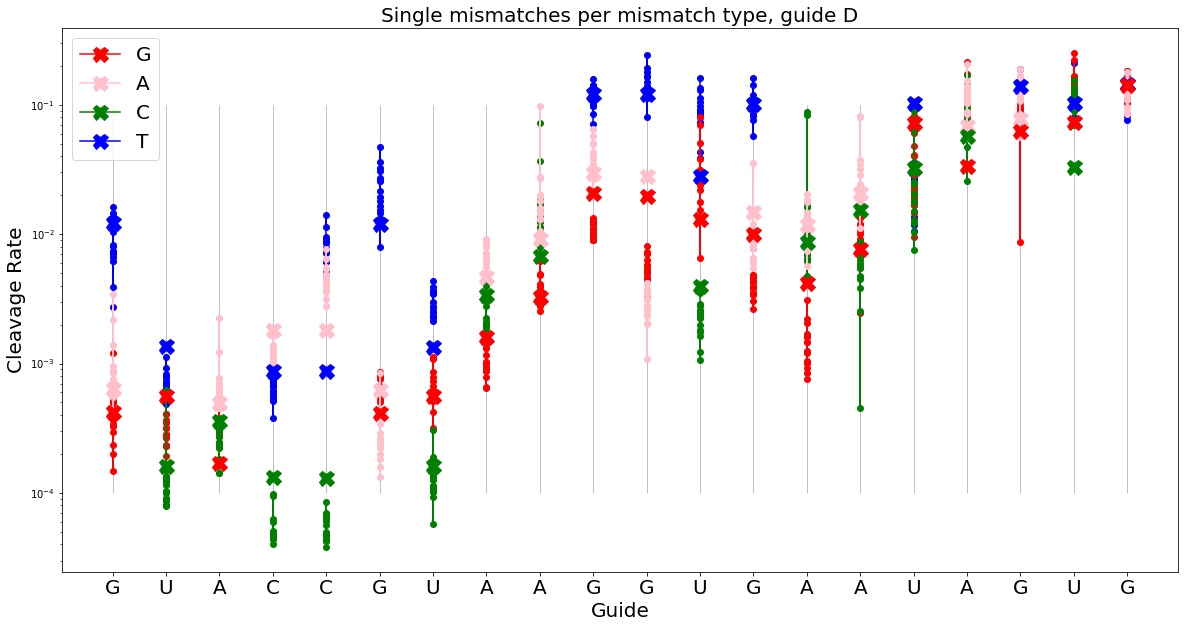

In [45]:
plt.figure(figsize=[20,10])
guideD = 'GTACCGTAAGGTGAATAGTG'

path = '../../data_nucleaseq_Finkelsteinlab/targetD/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
data = pd.read_csv(path+filename)
data.columns = [c.replace(' ', '_') for c in data.columns]

guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'
labelE = []
labelD = []
for i in range(20):
    labelE.append(guide_sequenceE[i])
    labelD.append(guide_sequenceD[i])

for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: preprocess.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
        #if guide_sequenceD[position-1] == 'C':
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plt.semilogy(np.ones(len(A))*position,A,color='blue',marker='o')
    plt.semilogy(np.ones(len(C))*position,C,color='red',marker='o')
    plt.semilogy(np.ones(len(G))*position,G,color='green',marker='o')
    plt.semilogy(np.ones(len(T))*position,T,color='pink',marker='o')
    
for i in range(20):
    if guideD[i]=='A':
        Ttemp = guideD[0:i] + 'T' + guideD[(i+1):20]
        Gtemp = guideD[0:i] + 'G' + guideD[(i+1):20]
        Ctemp = guideD[0:i] + 'C' + guideD[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideD],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideD],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideD],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
        
    elif guideD[i]=='T':
        Atemp = guideD[0:i] + 'A' + guideD[(i+1):20]
        Gtemp = guideD[0:i] + 'G' + guideD[(i+1):20]
        Ctemp = guideD[0:i] + 'C' + guideD[(i+1):20]

        
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideD],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideD],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideD],20)
        
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
    elif guideD[i]=='G':
        Ttemp = guideD[0:i] + 'T' + guideD[(i+1):20]
        Atemp = guideD[0:i] + 'A' + guideD[(i+1):20]
        Ctemp = guideD[0:i] + 'C' + guideD[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideD],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideD],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideD],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plotG = plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red',label='G')
    elif guideD[i]=='C':
        Ttemp = guideD[0:i] + 'T' + guideD[(i+1):20]
        Gtemp = guideD[0:i] + 'G' + guideD[(i+1):20]
        Atemp = guideD[0:i] + 'A' + guideD[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideD],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideD],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideD],20)
        
        plotA = plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink',label='A')
        plotC = plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green',label='C')
        plotT = plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue',label='T')
        
plt.vlines(range(1,21),10**-4,10**-1,color='grey',linewidth=.5);
plt.xticks(range(1,21),labelD,fontsize=20);
plt.legend(handles=[plotG[0],plotA[0],plotC[0],plotT[0]],fontsize=20)
plt.xlabel('Guide',fontsize=20)
plt.ylabel('Cleavage Rate',fontsize=20)
plt.title('Single mismatches per mismatch type, guide D',fontsize=20)

20386.9522538
1189


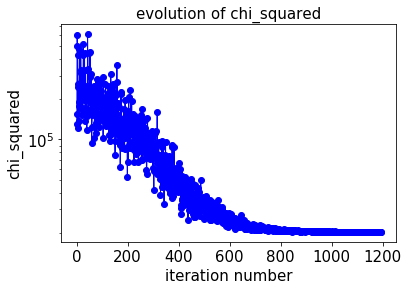

In [59]:
plt.semilogy(chi_trace, marker='o', linewidth=1, color='blue')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('chi_squared', fontsize=15)
plt.title('evolution of chi_squared', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
print chi_trace.values[-1]
print np.argmin(chi_trace.values)

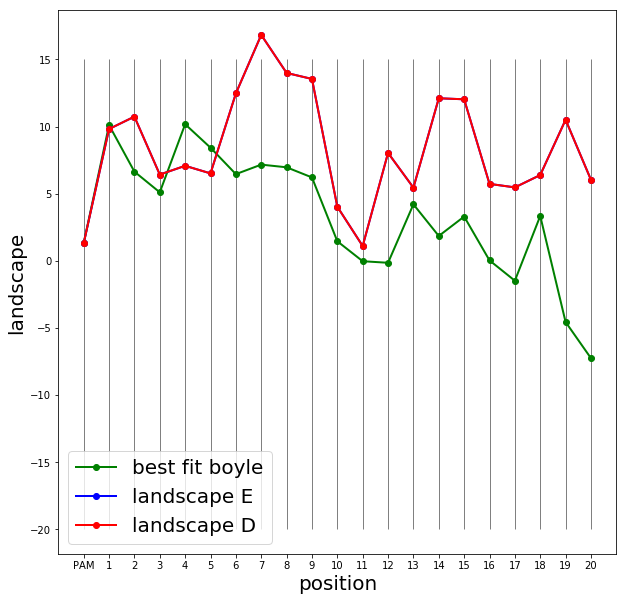

In [47]:
guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'

landscapeE,bindingEnergies,_ = model.unpack_parameters(parameters,modelID)
landscapeE[0] = -1.3
landscapeD = landscapeE.copy()

for i in range(20):
    if guide_sequenceE[i]=='G': 
        landscapeE[i+1] -= bindingEnergies[14] #GC
    if guide_sequenceE[i]=='C':
        landscapeE[i+1] -= bindingEnergies[11] #CG
    if guide_sequenceE[i]=='A':
        landscapeE[i+1] -= bindingEnergies[1] #AT
    if guide_sequenceE[i]=='U':
        landscapeE[i+1] -= bindingEnergies[4] #UA
        
for i in range(20):
    if guide_sequenceD[i]=='G': 
        landscapeD[i+1] -= bindingEnergies[14] #GC
    if guide_sequenceD[i]=='C':
        landscapeD[i+1] -= bindingEnergies[11] #CG
    if guide_sequenceD[i]=='A':
        landscapeD[i+1] -= bindingEnergies[1] #AT
    if guide_sequenceD[i]=='U':
        landscapeD[i+1] -= bindingEnergies[4] #UA
        
        
best_fit_boyle = np.loadtxt('../best_fit_new.txt')
best_fit_boyle = -np.cumsum(best_fit_boyle[0:21])
plt.figure(figsize=[10,10])
plot1 = plt.plot(range(0,21),best_fit_boyle,'g',label='best fit boyle',linewidth=2.,marker='o',markersize=6.)
plot2 = plt.plot(range(0,21),-np.cumsum(landscapeE),'b',label='landscape E',linewidth=2.,marker='o',markersize=6.)
plot3 = plt.plot(range(0,21),-np.cumsum(landscapeD),'r',label='landscape D',linewidth=2.,marker='o',markersize=6.)
plt.legend(fontsize=20)
plt.xlabel('position',fontsize=20)
plt.ylabel('landscape',fontsize=20)
plt.yticks(fontsize=10);
plt.xticks(range(0,21),['PAM']+range(1,21),fontsize=10);
plt.vlines(range(0,21),-20,15,linewidth=1.,color='grey')

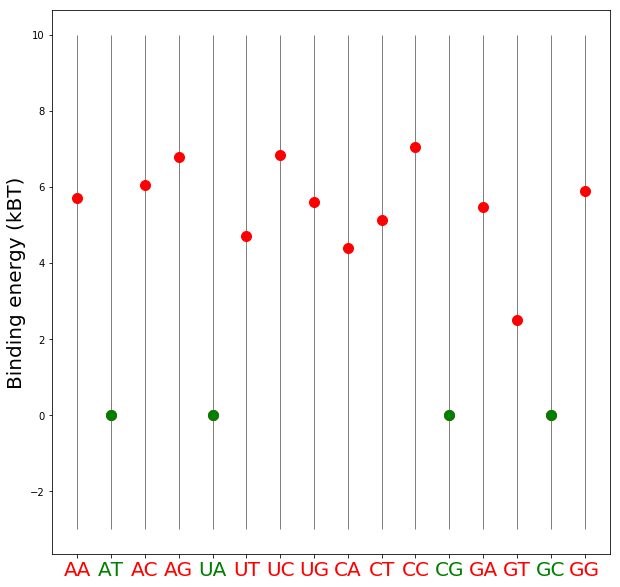

In [48]:
_,bindingEnergies,_ = model.unpack_parameters(parameters,modelID)

plt.figure(figsize=[10,10])
plt.plot(range(1,17),bindingEnergies,linewidth=0.,marker='o',markersize=10.,color='r')
plt.vlines(range(1,17),-3,10,linewidth=1.,color='grey')
plt.ylabel('Binding energy (kBT)',fontsize=20)
plt.xticks(range(1,17),['AA','AT','AC','AG','UA','UT','UC','UG','CA','CT','CC','CG','GA','GT','GC','GG'],fontsize=20,color='r');
plt.plot([2,5,12,15],[bindingEnergies[1],bindingEnergies[4],bindingEnergies[11],bindingEnergies[14]],linewidth=0.,marker='o',markersize=10.,color='g')
plt.gca().get_xticklabels()[1].set_color('g')
plt.gca().get_xticklabels()[4].set_color('g')
plt.gca().get_xticklabels()[11].set_color('g')
plt.gca().get_xticklabels()[14].set_color('g')